Out-of-control signal detected at time 1 (cn = 0.20202433864243918)
Out-of-control signal detected at time 2 (cn = 0.21441750161378614)
Out-of-control signal detected at time 3 (cn = 0.23663829341745313)
Out-of-control signal detected at time 4 (cn = 0.3101597779428822)
Out-of-control signal detected at time 5 (cn = 0.566146702329525)
Out-of-control signal detected at time 6 (cn = 0.5933652195052002)
Out-of-control signal detected at time 7 (cn = 0.5728254054180582)
Out-of-control signal detected at time 8 (cn = 0.7577356325968516)
Out-of-control signal detected at time 9 (cn = 1.0035495511017896)
Out-of-control signal detected at time 10 (cn = 0.9198159892917932)
Out-of-control signal detected at time 11 (cn = 0.8970786109183093)
Out-of-control signal detected at time 12 (cn = 0.9023588299391712)
Out-of-control signal detected at time 13 (cn = 0.9831839822848636)
Out-of-control signal detected at time 14 (cn = 1.046252564302291)
Out-of-control signal detected at time 15 (cn = 0.716357

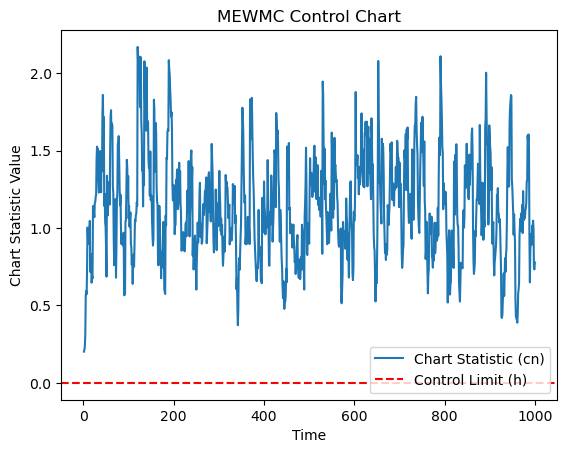

In [ ]:
# Dawar Qureshi (October 2023)
import numpy as np
import matplotlib.pyplot as plt

def simulate_mewmc_control_chart(n, p, alpha, h, target_arl):
    """
    Simulate and plot a Multivariate Exponentially Weighted Moving Covariance Control Chart (MEWMC).

    Parameters:
    - n (int): Number of data points.
    - p (int): Number of variables.
    - alpha (float): Smoothing factor.
    - h (float): Initial control limit.
    - target_arl (int): Desired average run length.

    Returns:
    - None
    """
    
    # Extend the dataset to ensure sufficient data
    extended_data = np.random.multivariate_normal(mean=np.zeros(p), cov=np.identity(p), size=n*10)
    
    # Initialize MEWMC variables
    S = np.identity(p)  # Initial covariance matrix (identity matrix)
    cn_values = []  # To store chart statistic values

    runs = 0  # To count the number of runs
    i = 0     # Time index

    while runs < target_arl:
        # Compute MEWMC covariance matrix
        x = extended_data[i]  # Current data point from the extended dataset
        S = (1 - alpha) * S + alpha * np.outer(x, x)

        # Compute chart statistic (cn)
        det_S = np.linalg.det(S)
        log_det_S = np.log(det_S)
        cn = np.trace(S) - log_det_S - p

        cn_values.append(cn)

        # Check for out-of-control signal
        if cn > h:
            print(f"Out-of-control signal detected at time {i+1} (cn = {cn})")
            runs += 1  # Increment the run count

        i += 1

    # Plot chart statistic values over time
    plt.plot(range(1, i+1), cn_values, label='Chart Statistic (cn)')
    plt.axhline(h, color='red', linestyle='--', label='Control Limit (h)')
    plt.xlabel('Time')
    plt.ylabel('Chart Statistic Value')
    plt.legend()
    plt.title('MEWMC Control Chart')
    plt.show()

if __name__ == "__main__":
    # Example parameters
    n = 100  # Number of data points
    p = 6   # Number of variables
    alpha = 0.1  # Smoothing factor
    target_arl = 1000  # Desired average run length

    h = 0.0  # Initial control limit
    # Iterate to find the appropriate control limit 'h' for the desired ARL
    while True:
        simulate_mewmc_control_chart(n, p, alpha, h, target_arl)
        if input(f"ARL for h={h}: ") == 'stop':
            break
        h += 0.1  # Adjust 'h' incrementally
